* Radif Ramadan

* Data Science / JCSDOL-014

* Modul 3 - Day 28

---
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px

import plotly.graph_objects as go
import urllib, json

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
pasien = pd.read_csv('archive/patient.csv')
pasien

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan
...,...,...,...,...,...,...,...,...,...,...,...
888,889,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
889,890,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
890,891,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
891,892,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN


In [3]:
pasien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      893 non-null    int64  
 1   gender          156 non-null    object 
 2   age             156 non-null    float64
 3   nationality     156 non-null    object 
 4   province        156 non-null    object 
 5   current_state   166 non-null    object 
 6   contacted_with  27 non-null     float64
 7   confirmed_date  893 non-null    object 
 8   released_date   5 non-null      object 
 9   deceased_date   4 non-null      object 
 10  hospital        17 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.9+ KB


## Categorical

---

1. Categorical - Dot Plot

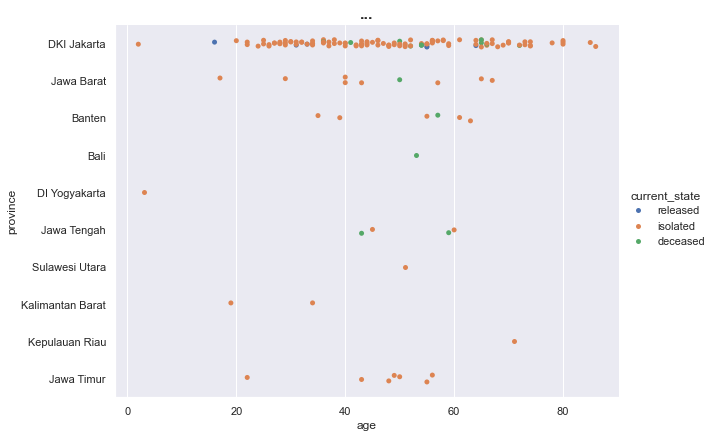

In [4]:
# Categorical - Dot Plot

sns.set()
sns.catplot(x = 'age',
            y = 'province',
            hue = 'current_state',
            data = pasien,
            height = 6,
            aspect = 1.5)
plt.title('...',
          weight = 'bold',
          fontsize = 16)
plt.show()

2. Categorical - Bar Chart

In [5]:
pasien_df = pasien.groupby(['province']).size().to_frame('count').reset_index()
pasien_df

,province,count
0,Bali,1
1,Banten,6
2,DI Yogyakarta,1
3,DKI Jakarta,124
4,Jawa Barat,9
5,Jawa Tengah,4
6,Jawa Timur,7
7,Kalimantan Barat,2
8,Kepulauan Riau,1
9,Sulawesi Utara,1


In [6]:
fig = px.bar(pasien_df,
             y = 'count',
             x = 'province',
             text = 'count')
fig.update_traces(textposition = 'outside')
fig.update_layout(uniformtext_minsize = 8,
                  uniformtext_mode = 'hide',
                  title = 'Jumlah Kasus Covid-19\nper Provinsi di Indonesia\n',
                  width = 600)
fig.show()

3. Categorical - Histogram

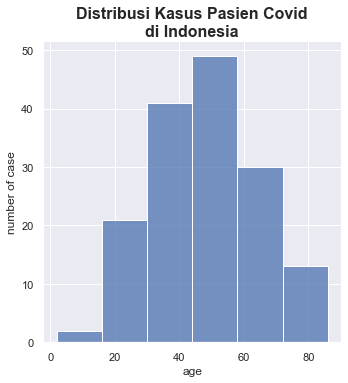

In [7]:
sns.displot(pasien['age'],
            kde = False,
            bins = 6)
plt.title('Distribusi Kasus Pasien Covid\ndi Indonesia',
          weight = 'bold').set_fontsize('16')
plt.ylabel('number of case')
plt.show()

4. Categorical - Radial Chart

In [8]:
df = px.data.wind()

fig = px.bar_polar(df,
                   r = 'frequency',
                   theta = 'direction',
                   color = 'strength',
                   color_discrete_sequence = px.colors.sequential.Plasma_r,
                   title = 'Kekuatan Tiupan Angin berdasarkan Arah Mata Angin',
                   width = 600)
fig.show()

5. Categorical - Sankey Diagram

In [9]:
url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4

data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity)) for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f", 
    valuesuffix = "TWh",
    node = dict(
        pad = 15,
        thickness = 15, 
        line = dict(
            color = "black", 
            width = 0.5), 
        label = data['data'][0]['node']['label'], 
        color = data['data'][0]['node']['color']
    ),
    link = dict(
        source = data['data'][0]['link']['source'],
        target = data['data'][0]['link']['target'],
        value = data['data'][0]['link']['value'],
        label = data['data'][0]['link']['label'],
        color = data['data'][0]['link']['color']
))])

fig.update_layout(title_text="<b>Prediksi Energi pada 2050</b>", 
font_size=14)
fig.show()

6. Categorical - Word Cloud

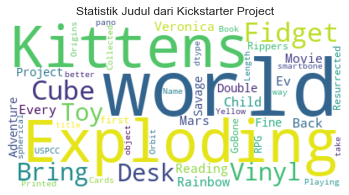

In [11]:
stopwords = set(STOPWORDS)
data = pd.read_csv('archive/most_backed.csv')

wordcloud = WordCloud(background_color = 'white',
                      stopwords = stopwords).generate(str(data['title']))

fig = plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Statistik Judul dari Kickstarter Project")
plt.axis('off')
plt.show()

## Hierarchial

---

1. Hierarchial - Pie Chart

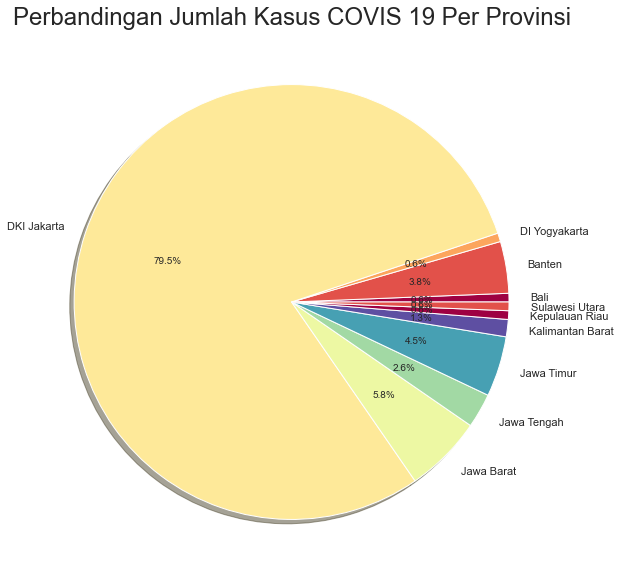

In [42]:
source_labels = pasien.groupby(['province']).size().index
source_counts = pasien.groupby(['province']).size().values

plt.figure(1, figsize=(20,10))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
source_pie = plt.pie(source_counts, 
                     labels = source_labels, 
                     autopct = '%1.1f%%', 
                     shadow = True, 
                     colors = colors)
plt.title('Perbandingan Jumlah Kasus COVID 19 Per Provinsi', 
          fontsize = 24)
plt.show()

2. Hierarchial - Stacked Bar Chart

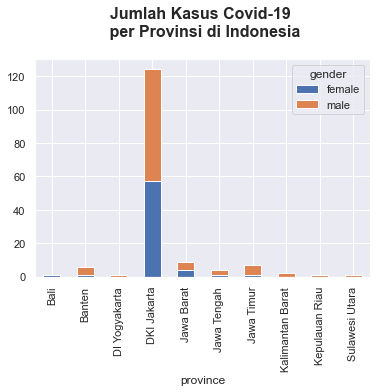

In [43]:
pasien_df = pasien.groupby(['province','gender']).size().to_frame('count').reset_index()
pasien_df

tmp = pasien_df.set_index(['province','gender']).unstack()
tmp.columns = tmp.columns.levels[1]
tmp.head()

tmp.plot(kind='bar',stacked=True);

plt.title('Jumlah Kasus Covid-19 \n per Provinsi di Indonesia\n', 
weight='bold').set_fontsize('16')
plt.show()

3. Hierarchial - Square Pie Chart

In [16]:
from pywaffle import Waffle

ModuleNotFoundError: No module named 'pywaffle'

In [4]:
raw_data = pd.read_csv('cardata.csv')

data = raw_data.groupby('Fuel_Type').size().reset_index(name = 'counts_Fuel_Type')
n_categories = data.shape[0]

n_categories = data.shape[0]
colors = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]
fig = plt.figure(
    FigureClass = Waffle,
    plots = {
        '111': {
            'values': data['counts_Fuel_Type'],
            'labels': ["{0}({1})".format(n[0],n[1]) for n in data[['Fuel_Type','counts_Fuel_Type']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize':12},
            'title': {'label': 'Vehicle by Fuel Type', 'loc': 'center', 'fontsize':18}
        },
    },
    rows = 7, 
    colors = colors, 
    figsize = (10, 7)
)
plt.show()

NameError: name 'pd' is not defined

4. Hierarchial - Tree Map

In [9]:
df = px.data.gapminder().query('year == 2007')
display(df.head(10))

df['world'] = 'world' # in order to have a single root node
fig = px.treemap(df, path = ['world', 'continent', 'country'], 
                 values = 'pop', 
                 color = 'lifeExp', 
                 hover_data = ['iso_alpha'], 
                 color_continuous_scale = 'RdBu', 
                 color_continuous_midpoint = np.average(df['lifeExp'], weights=df['pop']))
fig.show()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
71,Australia,Oceania,2007,81.235,20434176,34435.367440,AUS,36
83,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40
95,Bahrain,Asia,2007,75.635,708573,29796.048340,BHR,48
107,Bangladesh,Asia,2007,64.062,150448339,1391.253792,BGD,50
119,Belgium,Europe,2007,79.441,10392226,33692.605080,BEL,56


## Temporal

---

1. Temporal - Line Chart

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate,dailypositive_rate
0,2-Mar-20,NaN,339,2,2,335,2,2,0,0,0,0,0.59%,98.82%,0.00%,0.00%,0.00%
1,3-Mar-20,2.0,341,0,2,337,2,2,0,0,0,0,0.59%,98.83%,0.00%,0.00%,0.00%
2,4-Mar-20,31.0,372,0,2,356,14,2,0,0,0,0,0.54%,95.70%,0.00%,0.00%,0.00%
3,5-Mar-20,16.0,388,0,2,371,15,2,0,0,0,0,0.52%,95.62%,0.00%,0.00%,0.00%
4,6-Mar-20,62.0,450,2,4,422,24,4,0,0,0,0,0.89%,93.78%,0.00%,0.00%,3.23%


<Figure size 1440x720 with 0 Axes>

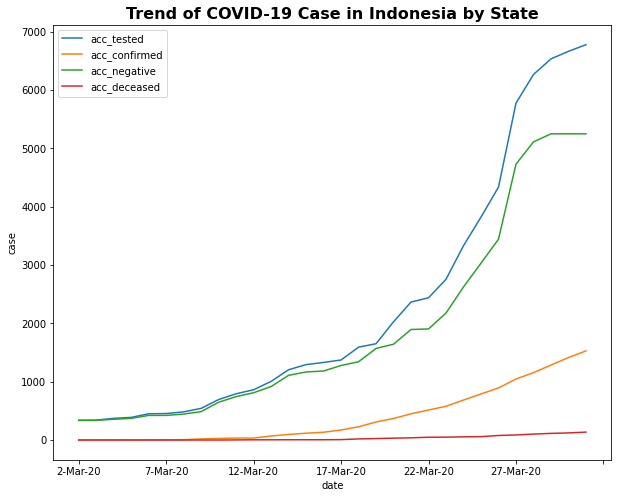

In [5]:
cases = pd.read_csv('archive/cases.csv')
display(cases.head())

plt.figure(figsize = (20, 10))

cases.plot('date', 
           ['acc_tested', 'acc_confirmed', 'acc_negative', 'acc_deceased'],
           figsize = (10,8))
plt.title("Trend of COVID-19 Case in Indonesia by State", weight='bold').set_fontsize('16')
plt.ylabel('case')
plt.show()

2. Temporal -  Area Chart

In [ ]:
# for title, color in zip(titles, colors):

# for i in range(2):
#     for j in range(2):
#         print(f'{i}, {j}')

for i in range(2):
    for j in range(2):
        for title, color in zip(titles, colors):
            print(f'{title}, {color}, [{i}, {j}]')

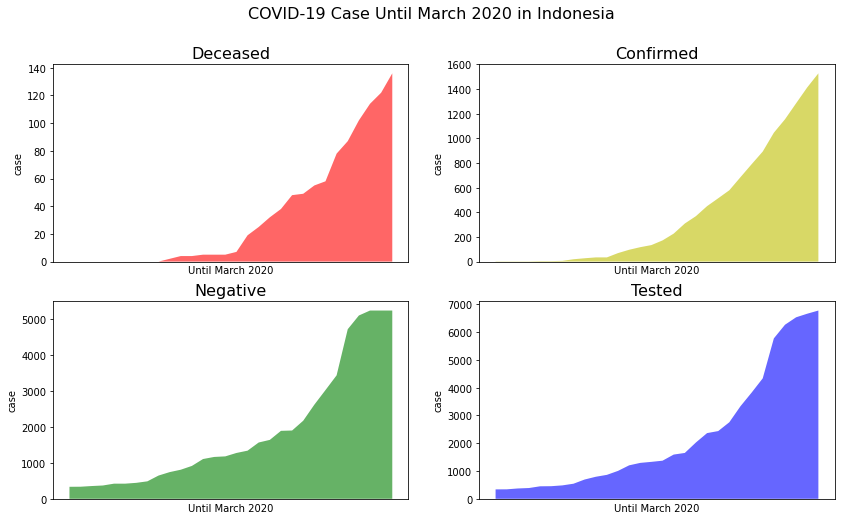

In [23]:
fig, axs = plt.subplots(2, 2,
                        figsize = (14, 8))
fig.suptitle('COVID-19 Case Until March 2020 in Indonesia').set_fontsize('16')

axs[0, 0].stackplot(cases['date'], cases['acc_deceased'], colors ='r', alpha =0.6)
axs[0, 0].set_title('Deceased').set_fontsize('16')
axs[0, 1].stackplot(cases['date'], cases['acc_confirmed'], colors ='y', alpha =0.6)
axs[0, 1].set_title('Confirmed').set_fontsize('16')
axs[1, 0].stackplot(cases['date'], cases['acc_negative'], colors ='g', alpha =0.6)
axs[1, 0].set_title('Negative').set_fontsize('16')
axs[1, 1].stackplot(cases['date'], cases['acc_tested'], colors ='b', alpha =0.6)
axs[1, 1].set_title('Tested').set_fontsize('16')

titles = ['Deceased', 'Confirmed', 'Negative', 'Tested']
colors = ['r', 'y', 'g', 'b']

for title, color in zip(titles, colors):
    for i in range(2):
        for j in range(2):
            axs[i, j].stackplot(cases['date'],)
            axs[i, j]

for ax in axs.flat:
    ax.set(xlabel = 'Until March 2020', ylabel = 'case')
    ax.set_xticks([])
plt.setp(ax.get_xticklabels(), rotation=45) 
plt.show()

3. Temporal - Stacked Area Chart

In [10]:
cases.info()
cases.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                30 non-null     object 
 1   new_tested          28 non-null     float64
 2   acc_tested          30 non-null     int64  
 3   new_confirmed       30 non-null     int64  
 4   acc_confirmed       30 non-null     int64  
 5   acc_negative        30 non-null     int64  
 6   being_checked       30 non-null     int64  
 7   isolated            30 non-null     int64  
 8   new_released        30 non-null     int64  
 9   acc_released        30 non-null     int64  
 10  new_deceased        30 non-null     int64  
 11  acc_deceased        30 non-null     int64  
 12  positive_rate       30 non-null     object 
 13  negative_rate       30 non-null     object 
 14  decease_rate        30 non-null     object 
 15  release_rate        30 non-null     object 
 16  dailyposit

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate,dailypositive_rate
0,2-Mar-20,NaN,339,2,2,335,2,2,0,0,0,0,0.59%,98.82%,0.00%,0.00%,0.00%
1,3-Mar-20,2.0,341,0,2,337,2,2,0,0,0,0,0.59%,98.83%,0.00%,0.00%,0.00%
2,4-Mar-20,31.0,372,0,2,356,14,2,0,0,0,0,0.54%,95.70%,0.00%,0.00%,0.00%
3,5-Mar-20,16.0,388,0,2,371,15,2,0,0,0,0,0.52%,95.62%,0.00%,0.00%,0.00%
4,6-Mar-20,62.0,450,2,4,422,24,4,0,0,0,0,0.89%,93.78%,0.00%,0.00%,3.23%


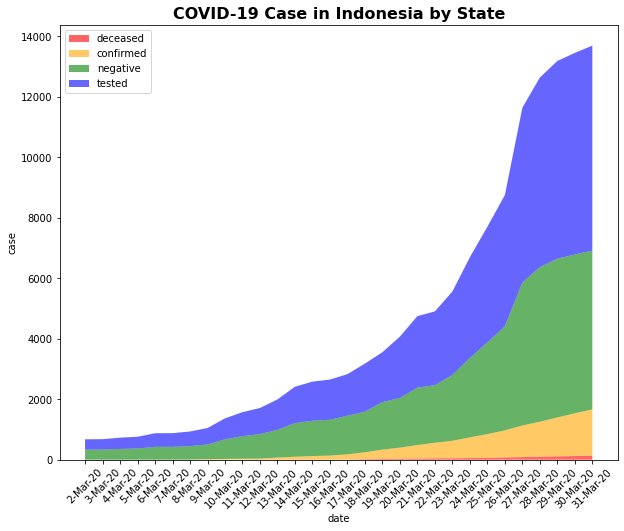

In [6]:
plt.figure(figsize = (10, 8))
plt.stackplot(cases['date'], 
              cases['acc_deceased'], 
              cases['acc_confirmed'], 
              cases['acc_negative'],
              cases['acc_tested'], 
              labels = ['deceased', 'confirmed', 'negative', 'tested'],
              colors = ['red','orange','green','blue'], 
              alpha = 0.6)
plt.xlabel('date')
plt.xticks(rotation = 45)
plt.ylabel('case')
plt.title('COVID-19 Case in Indonesia by State', 
          weight = 'bold').set_fontsize('16')
plt.legend(loc = 'upper left')
plt.show()

4. Temporal - Candlestick Chart

In [38]:
data = data.reset_index()
data[['Date']] = data[['Date']].apply(pd.to_datetime)
dates = data.Date
open_data = data.Open
high_data = data.High
low_data = data.Low
close_data = data.Close
fig = go.Figure(data=[go.Candlestick(x = dates,
                                     open = open_data,
                                     high = high_data,
                                     low = low_data,
                                     close = close_data)])
fig.update_layout(title_text = "<b>Apple Stock Prices from 2010 to 2017</b>",
font_size=12)
fig.show()

NameError: name 'data' is not defined